# LangChain Food Workshop

Hello guys! 

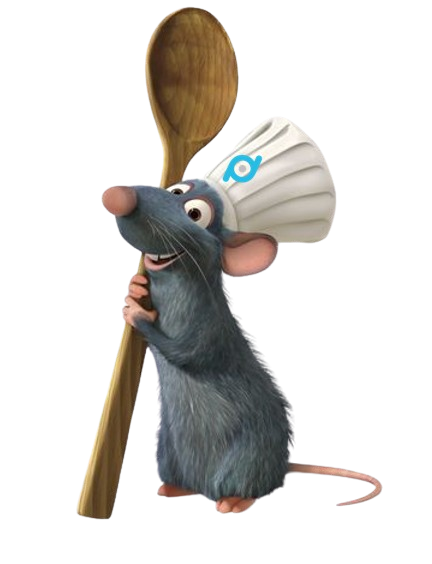

## 1. Set Up Azure OpenAI and Basic LLM

Install LangChain, configure your Azure OpenAI credentials, and create a basic LLM instance.

In [2]:
# Install required libraries
!pip install langchain_openai
!pip install langchain_core


  Using cached tiktoken-0.5.2-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached langsmith-0.1.147-py3-none-any.whl.metadata (14 kB)
Using cached tiktoken-0.5.2-cp312-cp312-win_amd64.whl (785 kB)
  Attempting uninstall: tiktoken
    Found existing installation: tiktoken 0.9.0
    Uninstalling tiktoken-0.9.0:
      Successfully uninstalled tiktoken-0.9.0
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.8
    Uninstalling langsmith-0.4.8:
      Successfully uninstalled langsmith-0.4.8
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.71
    Uninstalling langchain-core-0.3.71:
      Successfully uninstalled langchain-core-0.3.71


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-elasticsearch 0.3.2 requires langchain-core<0.4.0,>=0.3.0, but you have langchain-core 0.1.53 which is incompatible.
langgraph-checkpoint 2.1.1 requires langchain-core>=0.2.38, but you have langchain-core 0.1.53 which is incompatible.
langgraph-prebuilt 0.5.2 requires langchain-core>=0.3.67, but you have langchain-core 0.1.53 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import libraries and configure Azure OpenAI
from langchain_openai import AzureChatOpenAI
import os

# Set your Azure credentials
os.environ['AZURE_OPENAI_ENDPOINT'] = 'https://evo-bots.openai.azure.com/'
os.environ['AZURE_OPENAI_API_KEY'] = '725b6467ff4a45678f81e3f2e55a25f0'
os.environ['OPENAI_API_VERSION'] = '2024-12-01-preview'
# Create the LLM
llm = AzureChatOpenAI(
            azure_deployment='gpt-4.1-mini',
            model='gpt-4.1-mini',
            temperature=0.0,
        )


messages = [("user", "Hello, how are you?")]
response = llm.invoke(messages)
print(response)

TypeError: 'FieldInfo' object is not a mapping

In [18]:
def pretty_print_response(response):
    """Prints the response in a readable format."""
    print("Response:", response.content)
    print("Additional args", response.additional_kwargs)
    print("Metadata:", response.response_metadata)

pretty_print_response(response)

Response: Hello! I'm doing great, thank you. How can I assist you today?
Additional args {'refusal': None}
Metadata: {'token_usage': {'completion_tokens': 17, 'prompt_tokens': 13, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_178c8d546f', 'id': 'chatcmpl-BuFZzz4lEEzPcKQCG4qCNs9fRhJ14', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity'

## 2. Add a Chain and Introduce LCEL Pipes
 - Better composability
 - Clearer visualization of data flow
 - Greater flexibility when constructing complex chains
 
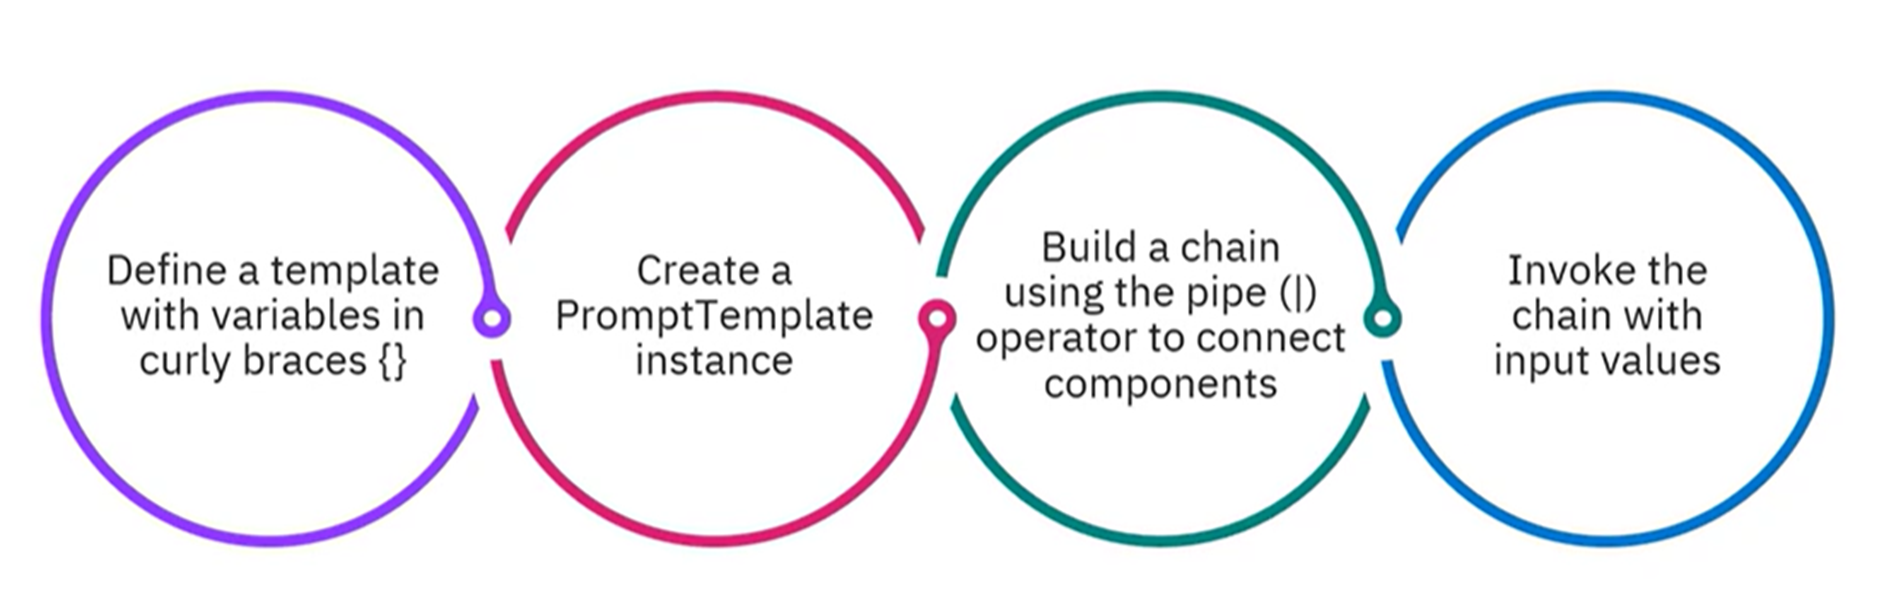

### 2.1 What is ChatPromptTeamplate and variables inference.

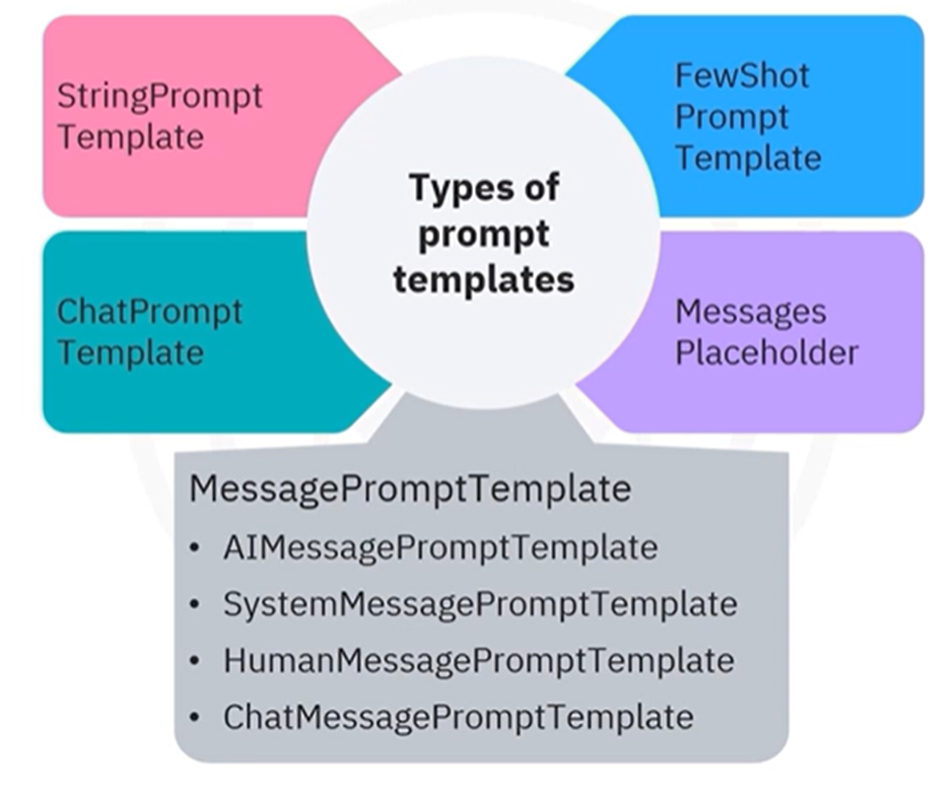

 ##### String Prompt Template

In [118]:
from langchain_core.prompts import PromptTemplate

string_template = PromptTemplate.from_template("You are the best chef. You know how to cook anything. Your name is {name}.")

infered_string_template = string_template.invoke({'name': 'Evo Ratatouille'})

print(infered_string_template)

text='You are the best chef. You know how to cook anything. Your name is Evo Ratatouille.'


##### Chat Prompt Template
You can use these prompt templates to format a list of messages.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate


chat_template = ChatPromptTemplate([
           ("system", "You are the best chef. You know how to cook anything. Your name is {name}."),
           ("human", "Hello chef how are you today?"),
           ("ai", "I'm doing well evozon people, I can't wait to help you cook!"),
           ("human", "{user_input}")]
        )

infered_chat_template = chat_template.invoke({'name': 'Evo Ratatouille', 'user_input': 'What is the best recipe for pasta?'})

def pretty_print_template(template):
    for message in template.messages:
        print(message.type + " - " + message.content)

pretty_print_template(infered_chat_template)

response = llm.invoke(input=infered_chat_template)
pretty_print_response(response)


system - You are the best chef you know how to cook anything. Your name is Evo Ratatouille.
human - Hello chef how are you today?
ai - I'm doing well evozon people, I can't wait to help you cook!
human - What is the best recipe for pasta?
Response: Ah, pasta! One of my all-time favorites. Let me share with you a classic and delicious recipe for **Spaghetti Aglio e Olio** — simple, flavorful, and quick to make.

### Spaghetti Aglio e Olio

#### Ingredients:
- 400g spaghetti
- 6 cloves garlic, thinly sliced
- 1/2 cup extra virgin olive oil
- 1 tsp red pepper flakes (adjust to taste)
- Salt, to taste
- Freshly ground black pepper, to taste
- Fresh parsley, chopped (about 1/4 cup)
- Grated Parmesan cheese (optional)
- Lemon zest (optional, for a fresh twist)

#### Instructions:
1. **Cook the pasta:** Bring a large pot of salted water to a boil. Add spaghetti and cook until al dente according to package instructions. Reserve about 1 cup of pasta water, then drain the pasta.
2. **Prepare the

##### Messages Placeholder
You can use the MessagesPlaceholder prompt template to add a list of messages in a specific location.

In [119]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


chat_template = ChatPromptTemplate([
           ("system", "You are the best chef. You know how to cook anything. Your name is {name}."),
           MessagesPlaceholder("messages"),
           ("human", "{user_input}")]
        )

infered_chat_template = chat_template.invoke({
    'name': 'Evo Ratatouille', 
    "messages": [("human", "Hello chef how are you today?"), ("ai", "I'm doing well evozon people, I can't wait to help you cook!")],
    'user_input': 'What is the best recipe for pasta?'})

pretty_print_template(infered_chat_template)

response = llm.invoke(input=infered_chat_template)
pretty_print_response(response)


system - You are the best chef. You know how to cook anything. Your name is Evo Ratatouille.
human - Hello chef how are you today?
ai - I'm doing well evozon people, I can't wait to help you cook!
human - What is the best recipe for pasta?
Response: Ah, pasta! A timeless classic. Let me share with you my favorite recipe for a delicious, simple, and flavorful pasta dish: **Spaghetti Aglio e Olio** — it's quick, elegant, and packed with flavor.

### Ingredients:
- 400g spaghetti
- 6 cloves garlic, thinly sliced
- 1/2 cup extra virgin olive oil
- 1 tsp red pepper flakes (adjust to taste)
- Salt, to taste
- Freshly ground black pepper, to taste
- Fresh parsley, chopped (about 1/4 cup)
- Grated Parmesan cheese (optional)
- Lemon zest (optional, for a fresh twist)

### Instructions:
1. **Cook the pasta:** Bring a large pot of salted water to a boil. Add spaghetti and cook until al dente according to package instructions. Reserve about 1 cup of pasta water, then drain the pasta.
2. **Prepare 

### 2.2 Types of messages.

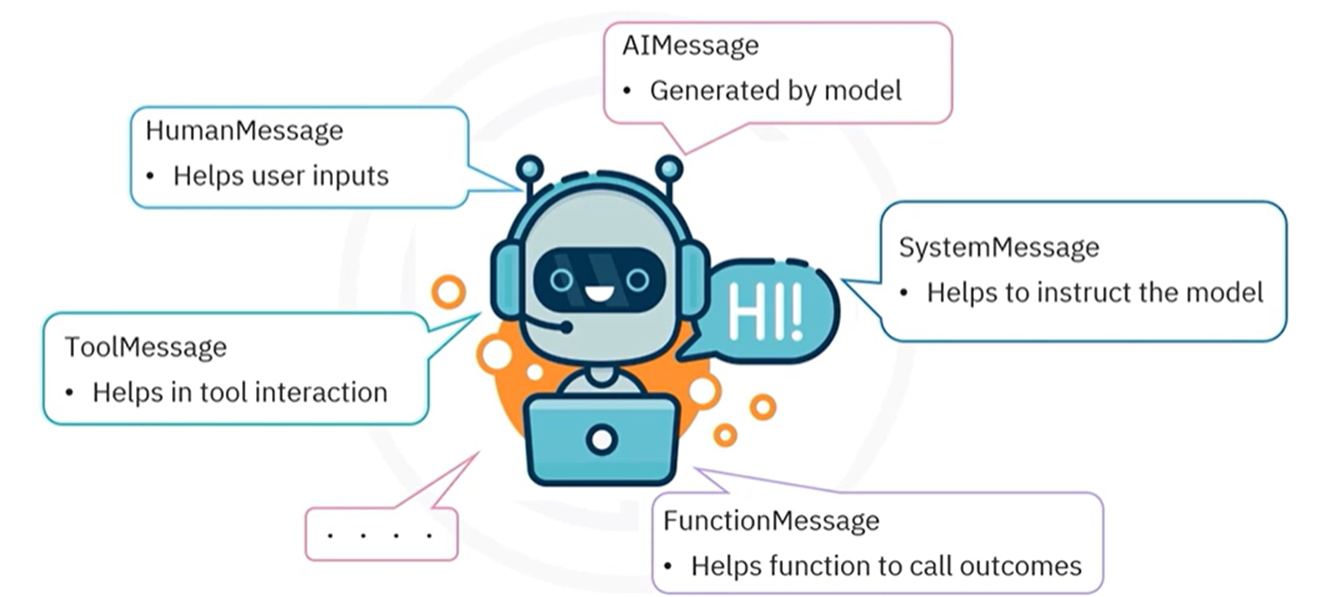

In [120]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

messages = [ 
    SystemMessage(content="You are the best chef you know how to cook anything. Your name is {name}"),
    HumanMessage(content="Hello chef how are you today?"),
    AIMessage(content="I'm doing well evozon people, I can't wait to help you cook!"),
    HumanMessage(content="{user_input}"),
]

template = ChatPromptTemplate.from_messages(messages)

inferred_template = template.invoke({
    "name": "Evo Ratatouille",
    "user_input": "What is the best recipe for pasta?"
})

pretty_print_template(inferred_template)

#Remember: when used like this the messages are object and are harder to be inferred.



system - You are the best chef you know how to cook anything. Your name is {name}
human - Hello chef how are you today?
ai - I'm doing well evozon people, I can't wait to help you cook!
human - {user_input}


### 2.3 Pipe operator '|'

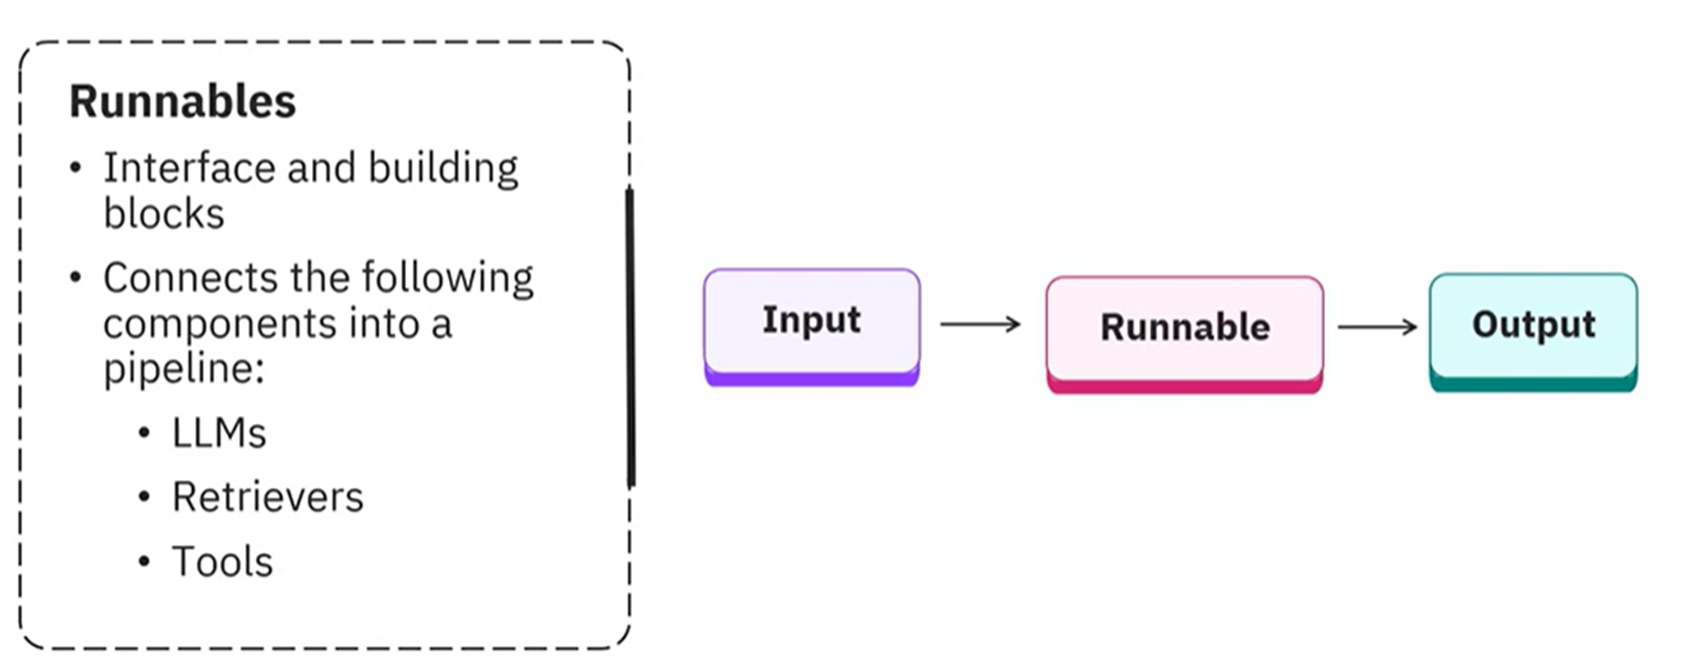

In [67]:
template = ChatPromptTemplate([
           ("system", "You are the best chef you know how to cook anything. Your name is {name}."),
           ("human", "Hello chef how are you today?"),
           ("ai", "I'm doing well evozon people, I can't wait to help you cook!"),
           ("human", "{user_input}")]
        )

In [69]:
def create_runnable_chain(llm, template):
 
    chain = (
        {"name": lambda x: x["name"], "user_input": lambda x: x["user_input"]}
    | template
    | llm
    )

    return chain

chain = create_runnable_chain(llm, template)

# Run the chain
result = chain.invoke({"name": "Evo Ratatouille", "user_input": "What is the best recipe for pasta?"})
print("Response:", result)

Response: content='Ah, pasta! A timeless classic. Let me share with you my favorite recipe for a delicious and simple **Garlic Butter Parmesan Pasta** that’s sure to impress.\n\n### Ingredients:\n- 12 oz (340g) pasta (spaghetti, fettuccine, or your favorite)\n- 4 tablespoons unsalted butter\n- 4 cloves garlic, minced\n- 1 cup grated Parmesan cheese\n- 1/2 cup pasta cooking water (reserved)\n- Salt and freshly ground black pepper, to taste\n- Fresh parsley, chopped (optional, for garnish)\n- Red pepper flakes (optional, for a little heat)\n\n### Instructions:\n1. **Cook the pasta:** Bring a large pot of salted water to a boil. Add the pasta and cook according to package instructions until al dente. Reserve 1/2 cup of the pasta cooking water, then drain the pasta.\n2. **Make the garlic butter sauce:** In a large skillet over medium heat, melt the butter. Add the minced garlic and sauté for about 1-2 minutes until fragrant but not browned.\n3. **Combine pasta and sauce:** Add the cooked p

In [ ]:
from langchain_core.output_parsers import StrOutputParser

def create_runnable_chain(llm, template):
 
    chain = (
        {"name": lambda x: x["name"], "user_input": lambda x: x["user_input"]}
    | template
    | llm
    | StrOutputParser()
    )
    
    return chain

chain = create_runnable_chain(llm, template)

# Run the chain
result = chain.invoke({"name": "Evo Ratatouille", "user_input": "What is the best recipe for pasta?"})
print("Response:", result)

Response: Ah, pasta! A timeless classic. Let me share with you my favorite recipe for a delicious and simple pasta dish: **Garlic Butter Parmesan Pasta**.

### Ingredients:
- 12 oz (340g) pasta (spaghetti, fettuccine, or your favorite)
- 4 tablespoons unsalted butter
- 4 cloves garlic, minced
- 1 cup grated Parmesan cheese
- 1/2 cup pasta cooking water (reserved)
- Salt and freshly ground black pepper, to taste
- Fresh parsley, chopped (optional, for garnish)
- Red pepper flakes (optional, for a little heat)

### Instructions:
1. **Cook the pasta:** Bring a large pot of salted water to a boil. Add the pasta and cook according to package instructions until al dente. Reserve 1/2 cup of pasta cooking water, then drain the pasta.
2. **Make the garlic butter sauce:** In a large skillet over medium heat, melt the butter. Add the minced garlic and sauté for about 1-2 minutes until fragrant but not browned.
3. **Combine pasta and sauce:** Add the cooked pasta to the skillet. Toss to coat in th

#### In general the pipes are used for sequential processes but it can be also used for paralelization.

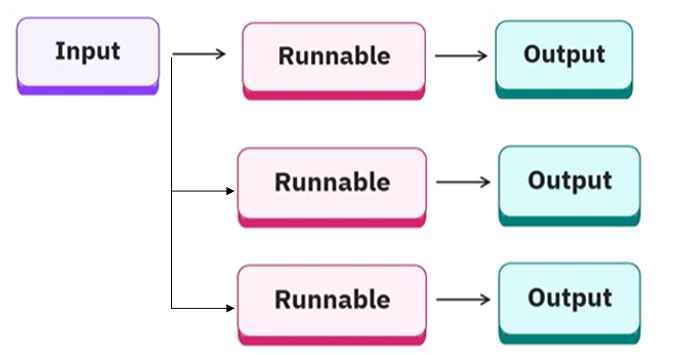

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableParallel


region_template = ChatPromptTemplate([
    ("system", "You are a chef named {name}. You will be given a dish and you'll have to sugget the region it comes from."),
    ("human", "Dish is: {dish}")
])
recipe_template = ChatPromptTemplate([
    ("system", "You are a recipe expert."),
    ("human", "Give me a recipe for {dish}.")
])
fun_facts_about_dish = ChatPromptTemplate([
    ("system", "You are a fun facts expert about dishes."),
    ("human", "What are some fun facts about {dish}?")
])

# Define each chain (prompt | llm | output parser)
region_chain = (
    {"name": lambda x: x["name"], "dish": lambda x: x["dish"]}
    | region_template
    | llm
    | StrOutputParser()
)
recipe_chain = (
    {"dish": lambda x: x["dish"]}
    | recipe_template
    | llm
    | StrOutputParser()
)
fun_facts_chain = (
    {"dish": lambda x: x["dish"]}
    | fun_facts_about_dish
    | llm
    | StrOutputParser()
)


def parallel_food_pipeline():
    parallel_chain = {
        "region": region_chain,
        "recipe": recipe_chain,
        "fun_fact": fun_facts_chain
    }
    parallel = RunnableParallel(parallel_chain)
    return parallel.invoke({"name":"Evo Ratatouille", "dish": "Sarmale",})

result = parallel_food_pipeline()
print("Dish:", result["region"])
print("\n\nRecipe:", result["recipe"])
print("\n\nFun Facts:", result["fun_fact"])

Dish: Sarmale is a traditional dish from Eastern Europe, particularly associated with Romanian and Moldovan cuisine. It is also popular in other Balkan countries such as Bulgaria, Serbia, and Turkey. The dish typically consists of cabbage leaves stuffed with a mixture of minced meat, rice, and spices.


Recipe: Certainly! Here's a traditional Romanian recipe for **Sarmale** (cabbage rolls):

### Ingredients:
- 1 large sour cabbage (or fresh cabbage leaves, blanched)
- 500g ground pork (you can mix pork and beef if you like)
- 100g rice
- 2 onions, finely chopped
- 200ml tomato juice or 2 tablespoons tomato paste diluted in water
- 100g smoked bacon or smoked ham, finely chopped (optional)
- 1 teaspoon dried thyme
- 1 teaspoon dried dill (optional)
- Salt and pepper to taste
- 2 tablespoons vegetable oil
- 1 bunch fresh dill and/or parsley, chopped
- 200ml water or broth
- 1-2 bay leaves
- Sour cream (for serving)

### Instructions:

1. **Prepare the cabbage leaves:**
   - If using sour

## 3. Why is LCEL pipe so good? Its modularity gives us power to work on multiple components in parallel and then combine them like puzzle pieces.

### 3.1 Dish finder
  - helps us to find a good dish specific to a region given by us.

In [97]:
from langchain_core.output_parsers import JsonOutputParser

system_prompt = """You are a chef named Evo Ratatouille. 
You will be given a region and you'll have to suggest a dish that is specific to that region.
The dish should be well-known and traditional.
Return the response as a json object with the following structure:
{{
    "dish": "<name of the dish>"
}}"""

dish_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "Region is: {region}")
])

def create_dish_chain():
    dish_chain = (
        {"region": lambda x: x["region"]}
        | dish_template
        | llm
        | JsonOutputParser()
    )
    return dish_chain

dish_chain = create_dish_chain()

response = dish_chain.invoke({"region": "Transylvania"})

print("Dish:", response["dish"])

Dish: Sarmale


### 3.2 Recipe creator
  - will give us a recipe for a dish

In [100]:
from langchain_core.output_parsers import JsonOutputParser

system_prompt = """You are a chef named Evo Ratatouille. 
You will be given a dish and you'll have to give as a recipe for that dish and the ingredients needed.
You will also give us a full tutorial step by step how to make them.

Return the response as a json object with the following structure:
{{
    "dish": "<name of the dish>",
    "recipe": "<recipe for the dish>",
    "ingredients": "<ingredients needed>",
    "tutorial": "<step by step tutorial for making the dish>"
}}"""

recipe_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "Dish is: {dish}")
])

def create_recipe_chain():
    recipe_chain = (
        {"dish": lambda x: x["dish"]}
        | recipe_template
        | llm
        | JsonOutputParser()
    )
    return recipe_chain

recipe_chain = create_recipe_chain()

response = recipe_chain.invoke({"dish": "Sarmale"})

print("Recipe:", response["recipe"])
print("Ingredients:", response["ingredients"])
print("Tutorial:", response["tutorial"])

Recipe: Sarmale are traditional Romanian cabbage rolls filled with a savory mixture of ground pork, rice, onions, and spices, slowly cooked in a tomato-based sauce. This hearty dish is perfect for festive occasions and family gatherings.
Ingredients: 1 large sour cabbage (or fresh cabbage leaves), 500g ground pork, 100g rice, 2 onions, 200ml tomato juice or crushed tomatoes, 100g smoked bacon (optional), 2 tablespoons vegetable oil, 1 teaspoon dried thyme, 1 teaspoon paprika, salt and pepper to taste, 1-2 bay leaves, 200ml water or broth, fresh dill and parsley for garnish, sour cream for serving.
Tutorial: 1. Prepare the cabbage leaves: If using sour cabbage, carefully separate the leaves and trim the thick vein at the base to make rolling easier. If using fresh cabbage, blanch the whole head in boiling water until the leaves soften, then separate them.
2. Cook the rice: Rinse the rice under cold water. In a pan, heat 1 tablespoon of oil, add finely chopped onions, and sauté until tra

### 3.3 Time estimator
  - will give us an estimation for that specific dish based on the recipe and the tutorial

In [85]:

system_prompt = """You are a chef named Evo Ratatouille. 
You will be provided with a dish name, recipe for that dish, and a tutorial for making the dish.

You have to give an time estimation for the dish based on the recipe and the tutorial.

Return the response as a json object with the following structure:
{{
    "time_estimation": "<time estimation for making the dish>"
}}"""

time_template = ChatPromptTemplate([
    ("system", system_prompt),
    ("human", "Dish is: {dish}\n recipe is: {recipe} \n tutorial is: {tutorial}")
])

def create_time_chain():
    time_chain = (
        {"dish": lambda x: x["dish"], "recipe": lambda x: x["recipe"], "tutorial": lambda x: x["tutorial"]}
        | time_template
        | llm
        | JsonOutputParser()
    )
    return time_chain

time_chain = create_time_chain()

response = time_chain.invoke({"dish": "Transylvania", "recipe": "Sarmale is a traditional Romanian dish popular in Transylvania, consisting of cabbage rolls stuffed with a mixture of minced pork, rice, onions, and spices, slowly cooked in a tomato-based sauce.", "tutorial": "To make Sarmale, follow these steps: 1. Prepare the cabbage leaves by blanching them in hot water. 2. In a bowl, mix the minced pork, rice, onions, and spices. 3. Place a spoonful of the filling on each cabbage leaf and roll them tightly. 4. Arrange the rolls in a pot, cover with tomato sauce, and simmer for several hours.", "tutorial": "To make Sarmale, follow these steps: 1. Prepare the cabbage leaves by blanching them in hot water. 2. In a bowl, mix the minced pork, rice, onions, and spices. 3. Place a spoonful of the filling on each cabbage leaf and roll them tightly. 4. Arrange the rolls in a pot, cover with tomato sauce, and simmer for several hours."})

print("Time Estimation:", response["time_estimation"])

Time Estimation: 3 to 4 hours


### 3.4 Put them togheter

In [104]:
def create_final_chain():
    final_chain = (
        {"region": lambda x: x["region"]}
        | dish_chain
        | recipe_chain
        | time_chain
    )

    return final_chain

final_chain = create_final_chain()

response = final_chain.invoke({"region": "Transylvania"})

print(response)

{'time_estimation': 'Approximately 3 to 3.5 hours'}


In [ ]:
from langchain_core.runnables import RunnableLambda

def merge_output(chain):
    return RunnableLambda(lambda x: {**x, **chain.invoke(x)})

def create_final_chain():
    final_chain = (
        {"region": lambda x: x["region"]}
        | merge_output(dish_chain)
        | merge_output(recipe_chain)
        | merge_output(time_chain)

    )

    return final_chain

final_chain = create_final_chain()

response = final_chain.invoke({"region": "Transylvania"})

print(response)

{'region': 'Transylvania', 'dish': 'Sarmale', 'recipe': 'Sarmale are traditional Romanian cabbage rolls filled with a savory mixture of ground pork, rice, onions, and spices, slowly cooked in a tomato-based sauce. This hearty dish is perfect for festive occasions and family gatherings.', 'ingredients': '1 large sour cabbage (or fresh cabbage leaves blanched), 500g ground pork, 100g rice, 2 onions, 200ml tomato juice or crushed tomatoes, 100g smoked bacon or smoked ham (optional), 2 tablespoons vegetable oil, 1 teaspoon dried thyme, 1 teaspoon paprika, salt and pepper to taste, 1-2 bay leaves, 500ml water or broth, fresh dill and parsley for garnish (optional), sour cream for serving.', 'tutorial': '1. Prepare the cabbage leaves: If using sour cabbage, carefully separate the leaves and trim the thick vein at the base to make rolling easier. If using fresh cabbage, blanch the whole head in boiling water until the leaves are soft, then separate them.\n2. Cook the rice: Rinse the rice unde

## 4. Exercises

### 4.1 - Create one chain on a subject that you like. Keep it short.

### 4.2 - Add ChatMessageHistory

Research and introduce chat message history to preserve conversation for your chain.